In [1]:
!git clone https://github.com/sunsmarterjie/yolov12
%cd yolov12
!pip install roboflow supervision flash-attn --upgrade -q
!pip install -r requirements.txt
!pip install -e .


Cloning into 'yolov12'...
remote: Enumerating objects: 962, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 962 (delta 217), reused 199 (delta 189), pack-reused 722 (from 1)
Receiving objects: 100% (962/962), 1.59 MiB | 3.11 MiB/s, done.
Resolving deltas: 100% (458/458), done.
/content/yolov12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 62.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="vmTY6dXbNIXH11ILG1Dr")
project = rf.workspace("hoang-mumtg").project("seg_fissuras2-6esg0")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seg_Fissuras2-1 in yolov12:: 100%|██████████| 186/186 [00:00<00:00, 4682.38it/s]


In [3]:
#import ultralytics
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)


In [4]:

import os
import cv2
import json
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [7]:
#train
yolo_yaml_path = '/content/yolov12/Seg_Fissuras2-1/data.yaml'
model = YOLO('yolov12s.yaml').load('yolov12s.pt')

Transferred 739/739 items from pretrained weights


In [17]:
epoch = 100
imgsize = 640
batch_size = 8
patience = 5
lr = 0.005

result = model.train(
    data = yolo_yaml_path,
    epochs = epoch,
    imgsz = imgsize,
    batch = batch_size,
    lr0=lr,
    patience = patience,
    project = 'model',
    name = 'yolov12/detect/train'
)


New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov12/model/yolov12/detect/train3/weights/best.pt, data=/content/yolov12/Seg_Fissuras2-1/data.yaml, epochs=100, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=model, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /content/yolov12/Seg_Fissuras2-1/train/labels.cache... 61 images, 1 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/yolov12/Seg_Fissuras2-1/valid/labels.cache... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


Plotting labels to model/yolov12/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to model/yolov12/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.67G      1.654      1.728      1.748         31        640: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         17         64      0.481      0.188      0.177     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.77G      1.648      1.744      1.712         49        640: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         17         64      0.457      0.219      0.178     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.68G      1.479      1.707      1.642         29        640: 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         17         64      0.354      0.234      0.177       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.59G      1.562      1.672      1.711         36        640: 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         17         64      0.461      0.203      0.198     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       3.7G        1.4       1.56      1.587         10        640: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         17         64      0.547      0.188      0.231     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.61G      1.441      1.601      1.567         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         17         64      0.276      0.281      0.199     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.59G       1.44      1.494      1.564         29        640: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         17         64      0.333      0.312      0.185     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.7G      1.446      1.474      1.587         24        640: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         17         64      0.281      0.297      0.171     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.68G      1.435      1.455      1.572         26        640: 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         17         64      0.478      0.229      0.203      0.089
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 4, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



9 epochs completed in 0.013 hours.
Optimizer stripped from model/yolov12/detect/train4/weights/last.pt, 18.6MB
Optimizer stripped from model/yolov12/detect/train4/weights/best.pt, 18.6MB

Validating model/yolov12/detect/train4/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]


                   all         17         64      0.461      0.203      0.198     0.0969
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to model/yolov12/detect/train4


In [18]:
model_path = '/content/yolov12/model/yolov12/detect/train4/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project = 'model',
    name = 'yolov12/detect/val'
)

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


val: Scanning /content/yolov12/Seg_Fissuras2-1/valid/labels.cache... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         17         64      0.461      0.203      0.197     0.0962
Speed: 0.2ms preprocess, 21.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to model/yolov12/detect/val3


In [19]:
test_img_path = '/content/yolov12/Seg_Fissuras2-1/test/images/F29_jpg.rf.0021893742c064f2431e5d732679be9f.jpg'
model = YOLO(model_path)

model.predict(test_img_path,save=True)


image 1/1 /content/yolov12/Seg_Fissuras2-1/test/images/F29_jpg.rf.0021893742c064f2431e5d732679be9f.jpg: 256x640 3 fissura2s, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Results saved to /content/yolov12/runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fissura2'}
 obb: None
 orig_img: array([[[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [229, 234, 243],
         [224, 229, 238],
         [219, 224, 233]],
 
        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [228, 233, 242],
         [224, 229, 238],
         [220, 225, 234]],
 
        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [226, 231, 240],
         [224, 229, 238],
         [222, 227, 236]],
 
        ...,
 
        [[163, 157, 158],
         [163, 157, 158],
         [163, 157, 158],
         ...,
         [206, 208, 208],
         [204, 206, 206],
         [203, 205, 205]],
 
        [[156, 150, 151],
         [158, 152, 153],
         [161, 155, 156],
         ...,
         [205, 2

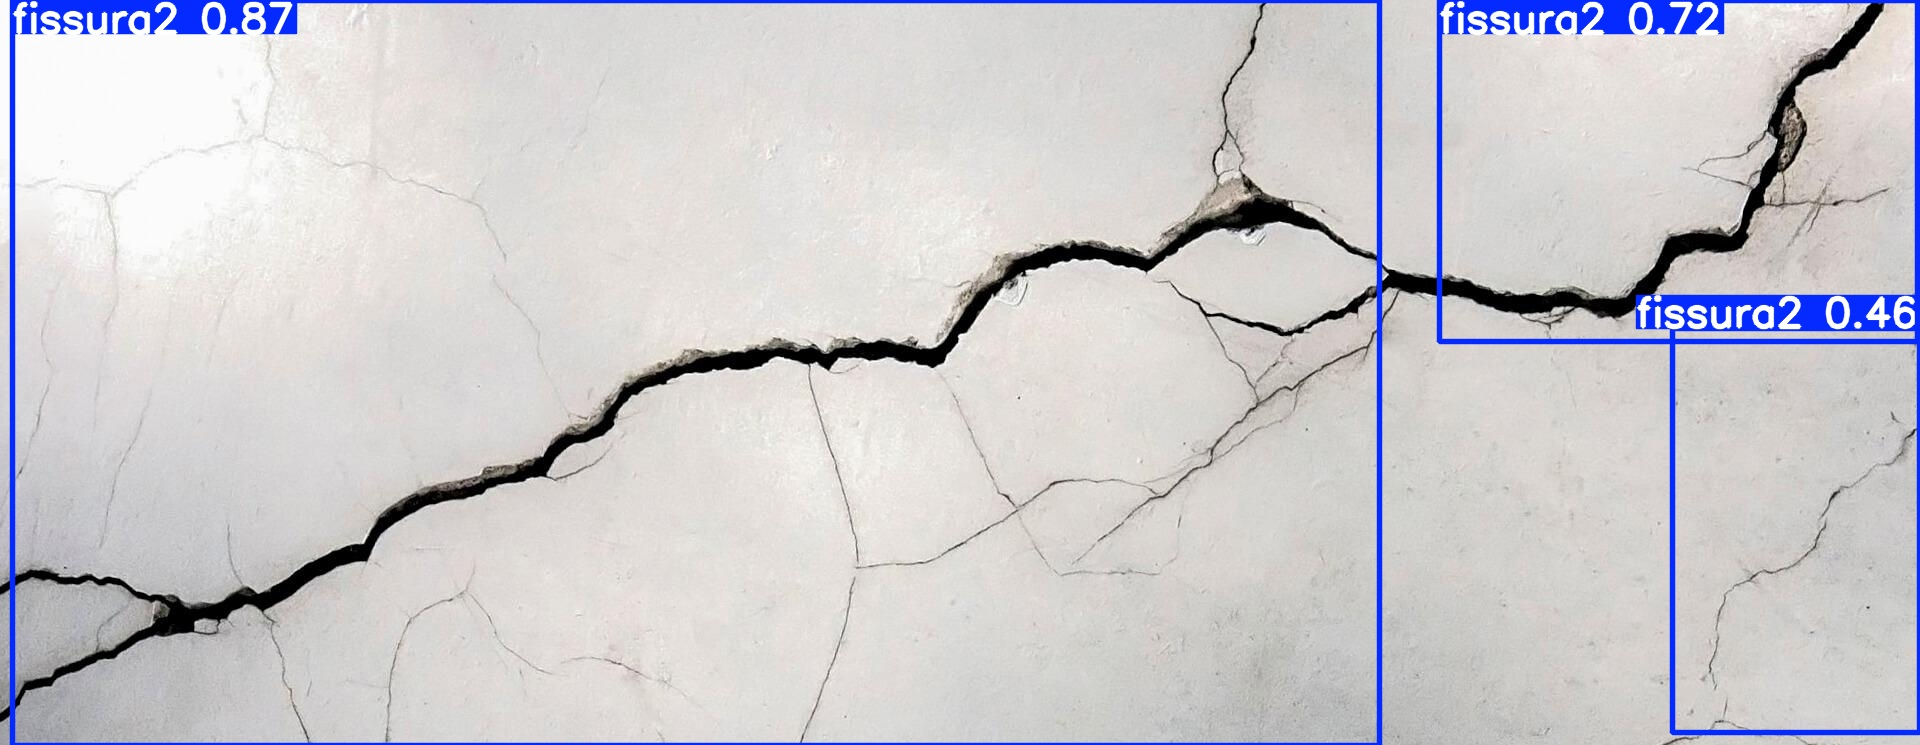

In [20]:
from google.colab.patches import cv2_imshow
result_path = '/content/yolov12/runs/detect/predict3/F29_jpg.rf.0021893742c064f2431e5d732679be9f.jpg'
image = cv2.imread(result_path)
cv2_imshow(image)

In [21]:
test_img_path = '/content/yolov12/Seg_Fissuras2-1/train/images/F47_jpg.rf.2a7268a4b40fc9dad86bfeb0bda93e56.jpg'
model = YOLO(model_path)

model.predict(test_img_path,save=True)


image 1/1 /content/yolov12/Seg_Fissuras2-1/train/images/F47_jpg.rf.2a7268a4b40fc9dad86bfeb0bda93e56.jpg: 640x640 5 fissura2s, 22.0ms
Speed: 4.1ms preprocess, 22.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/yolov12/runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fissura2'}
 obb: None
 orig_img: array([[[ 77, 168, 199],
         [ 77, 168, 199],
         [ 77, 168, 199],
         ...,
         [144, 216, 233],
         [144, 216, 233],
         [144, 216, 233]],
 
        [[ 77, 168, 199],
         [ 77, 168, 199],
         [ 77, 168, 199],
         ...,
         [144, 216, 233],
         [144, 216, 233],
         [144, 216, 233]],
 
        [[ 77, 168, 199],
         [ 77, 168, 199],
         [ 77, 168, 199],
         ...,
         [144, 216, 233],
         [144, 216, 233],
         [144, 216, 233]],
 
        ...,
 
        [[167, 207, 226],
         [156, 198, 217],
         [135, 181, 199],
         ...,
         [206, 227, 235],
         [206, 225, 233],
         [203, 222, 230]],
 
        [[163, 205, 224],
         [148, 191, 210],
         [129, 175, 193],
         ...,
         [203, 2

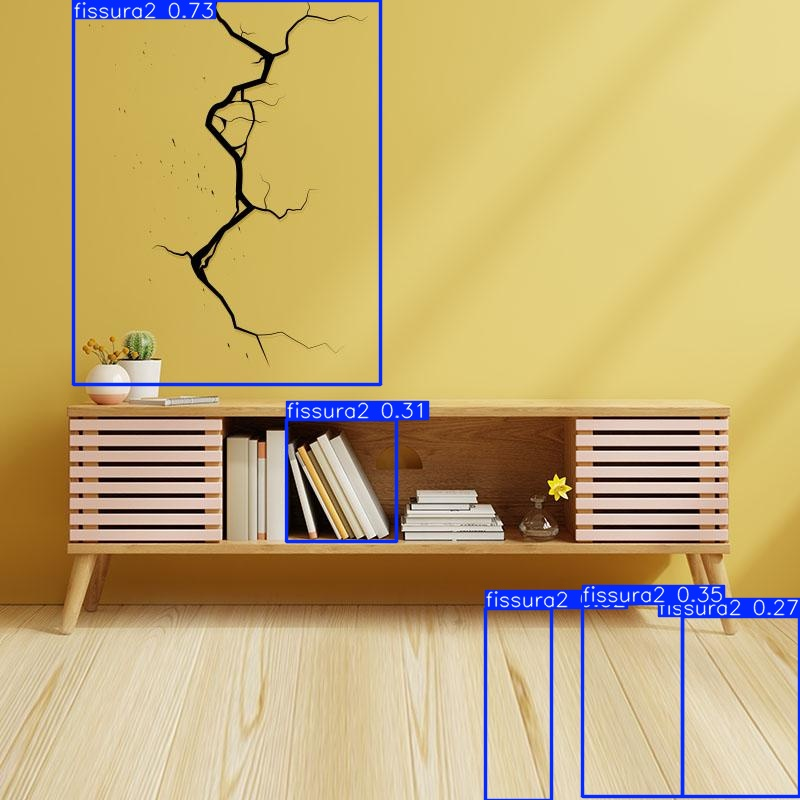

In [23]:
from google.colab.patches import cv2_imshow
result_path = '/content/yolov12/runs/detect/predict4/F47_jpg.rf.2a7268a4b40fc9dad86bfeb0bda93e56.jpg'
image = cv2.imread(result_path)
cv2_imshow(image)